<a href="https://colab.research.google.com/github/Shahana2421/KNN/blob/main/winedataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/drive/MyDrive/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.drop(["Id"],axis=1,inplace=True)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [ ]:
df['fixed acidity'].value_counts()

,count
fixed acidity,
7.2,43
7.1,41
7.8,40
7.0,40
7.5,37
...,...
14.3,1
15.9,1
11.8,1


In [ ]:
X=df.iloc[:,:-1]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [ ]:
y=df.iloc[:,-1]
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1138,6
1139,6
1140,5
1141,6


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
12,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5
758,9.9,0.32,0.56,2.0,0.073,3.0,8.0,0.99534,3.15,0.73,11.4
636,8.9,0.31,0.36,2.6,0.056,10.0,39.0,0.99562,3.40,0.69,11.8
1109,6.6,0.88,0.04,2.2,0.066,12.0,20.0,0.99636,3.53,0.56,9.9
743,7.6,0.42,0.25,3.9,0.104,28.0,90.0,0.99784,3.15,0.57,9.1
...,...,...,...,...,...,...,...,...,...,...,...
1044,6.7,1.04,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0
1095,8.0,0.39,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0
1130,7.4,0.35,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9
860,7.9,0.57,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5


In [ ]:
x_test.shape

(229, 11)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm.fit(x_train)
x_train=mm.transform(x_train)
x_test=mm.transform(x_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_test.values()

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
y_predict=knn.predict(x_test)
y_predict

array([6, 6, 5, 5, 5, 7, 5, 5, 5, 5, 7, 5, 5, 6, 5, 5, 6, 5, 5, 7, 6, 5,
       5, 7, 6, 5, 7, 5, 5, 6, 6, 6, 7, 6, 5, 5, 6, 6, 7, 6, 6, 5, 7, 5,
       5, 5, 6, 6, 5, 6, 7, 5, 5, 5, 6, 6, 6, 7, 6, 5, 6, 6, 6, 7, 6, 6,
       7, 5, 6, 5, 5, 6, 5, 6, 3, 6, 5, 5, 5, 6, 5, 7, 5, 6, 5, 6, 4, 5,
       5, 6, 3, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 4, 7,
       6, 6, 5, 5, 4, 6, 6, 7, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5,
       6, 5, 6, 5, 4, 6, 5, 6, 7, 5, 6, 5, 6, 5, 5, 6, 5, 6, 7, 5, 5, 5,
       6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 5, 4,
       7, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 7, 6, 5, 6,
       7, 6, 4, 5, 5, 6, 7, 6, 5, 5, 7, 7, 5, 6, 4, 6, 5, 5, 5, 5, 7, 5,
       5, 5, 5, 6, 5, 7, 6, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.5327510917030568

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)


array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  1,  2,  0],
       [ 2,  2, 63, 28,  1,  0],
       [ 0,  5, 34, 49, 11,  0],
       [ 0,  0,  3, 13, 10,  0],
       [ 0,  0,  0,  0,  2,  0]])

In [ ]:
new=[7.4,0.70,0.00,1.9,	0.076	,11.0,	34.0,	0.9978,	3.51	,0.56	,9.4]
new=mm.transform([new])
new

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.25454545, 0.39726027, 0.        , 0.06849315, 0.10684474,
        0.14925373, 0.10294118, 0.5887281 , 0.60629921, 0.13772455,
        0.17857143]])

In [ ]:
knn.predict(new)

array([5])

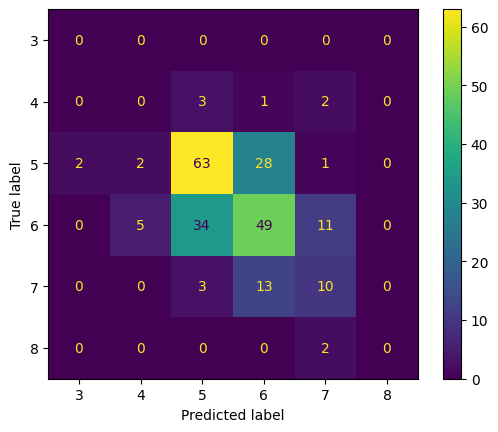

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_predict)
cm
